In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
!pip install keras-unet

In [4]:
import keras
from keras_unet.models import custom_unet

2023-04-05 11:46:53.907864: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/home/kunal.jain001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [5]:
SRCPATH = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/classified_images/good_images/'

DATAPATH = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/classified_images/npy_files'
images_file = os.path.join(DATAPATH, 'fly-mar-06-original-images.npy')
labels_file = os.path.join(DATAPATH, 'fly-mar-06-segmented.npy')


In [12]:
images = np.load(images_file)

In [13]:
images.shape

(56, 512, 512)

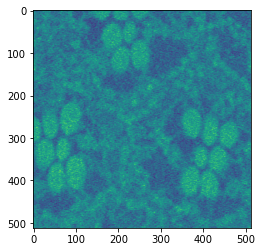

In [14]:
imshow(images[0])

In [15]:
img_file_names = os.listdir(SRCPATH)

In [17]:
import mahotas as mh

In [18]:
test_slices = []


for img in img_file_names:
    if (img.endswith("tif")):
        a = mh.imread(os.path.join(SRCPATH, img))
        a_cropped = a[1500:2012, 2968:3480].astype(np.float)
        a_cropped /= a_cropped.max()
        a_cropped *= 255

        test_slices.append(a_cropped)

/tmp/ipykernel_3151970/3044670991.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a_cropped = a[1500:2012, 2968:3480].astype(np.float)


In [19]:
test_slices = np.array(test_slices).astype(np.float64)

In [20]:
test_slices.shape

(253, 512, 512)

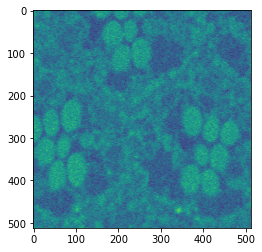

In [21]:
imshow(test_slices[0])

In [22]:
test_slices_expand_dims = np.expand_dims(test_slices, axis=3)

In [23]:
test_slices_expand_dims[0].shape

(512, 512, 1)

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import keras.optimizers
from keras_unet.metrics import iou, iou_thresholded
from keras_unet.losses import jaccard_distance

In [52]:
loaded_model = keras.models.load_model(os.path.join(DATAPATH, '03-10.hdf5'), custom_objects={"iou": iou, "iou_thresholded": iou_thresholded})

In [53]:
random_indeices = np.random.choice(200, 10)

In [54]:
random_indeices

array([164, 144, 152,  30,  38, 194, 152, 129, 104,  59])

In [55]:
ten_random_slices = np.empty([10, 512, 512, 1])
z = 0

for i in random_indeices:
    ten_random_slices[z] = test_slices_expand_dims[i]
    z = z + 1

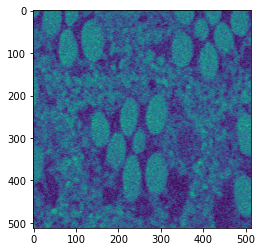

In [56]:
imshow(ten_random_slices[0])

In [57]:
ten_random_slices.shape

(10, 512, 512, 1)

In [58]:
y_predict = loaded_model.predict(ten_random_slices)

In [59]:
y_predict.shape

(10, 512, 512, 1)

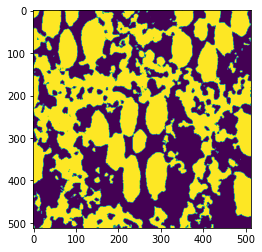

In [60]:
imshow(y_predict[0])

<Figure size 432x288 with 0 Axes>

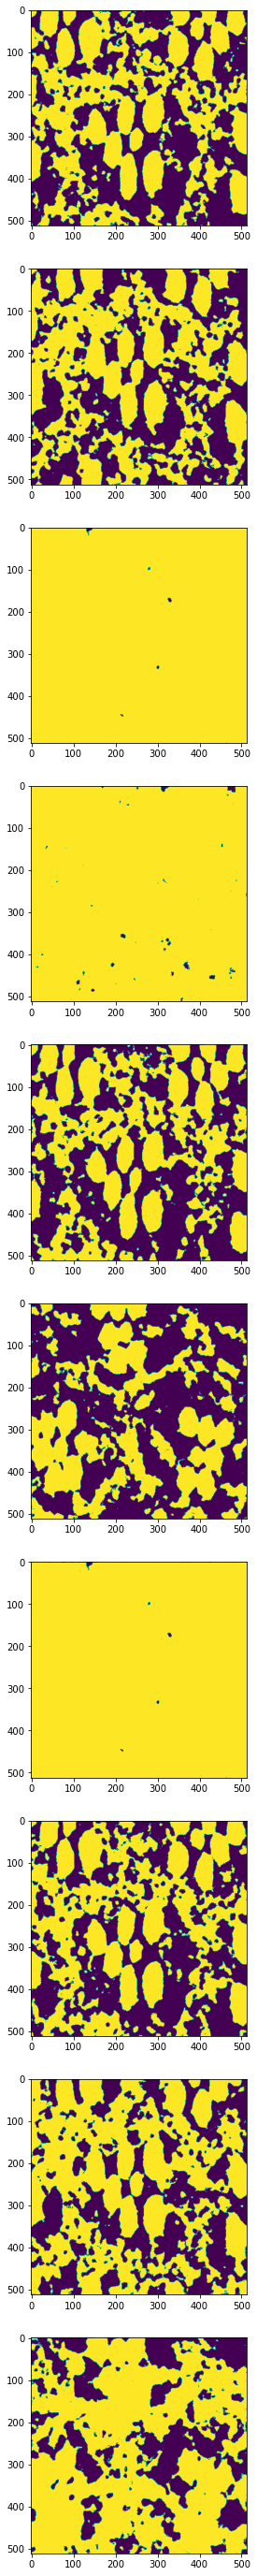

In [61]:
plt.figure()

f, axarr = plt.subplots(10,1) 

f.set_figheight(50)
f.set_figwidth(50)

for i in range(10):
    axarr[i].imshow(y_predict[i])

In [9]:
images = np.load(images_file)

In [10]:
images.shape

(56, 512, 512)

In [11]:
images_expanded_dims = images.reshape(images.shape[0],images.shape[1],images.shape[2],1)

In [5]:
DATAPATH = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/classified_images/npy_files'
images_file = os.path.join(DATAPATH, 'fly-mar-06-original-images.npy')
labels_file = os.path.join(DATAPATH, 'fly-mar-06-segmented.npy')

In [6]:
images = np.load(images_file)
labels = np.load(labels_file)

In [7]:
images.shape

(56, 512, 512)

In [8]:
# full dataset does not have the last channel
images = images.reshape(images.shape[0],images.shape[1],images.shape[2],1)
labels = labels.reshape(labels.shape[0],labels.shape[1],labels.shape[2],1)

In [9]:
images.shape

(56, 512, 512, 1)

In [10]:
p = np.random.permutation(len(images))

In [11]:
images = images[p]
labels = labels[p]

In [12]:
labels = labels.astype(np.float64)

In [13]:
import tensorflow as tf

images = images.astype(np.float64)

all_images = []
all_labels = []

for i in range(images.shape[0]):
    images[i] = (images[i] - images[i].min()) / (images[i].max() - images[i].min()) # normalize individually
    
    mask = labels[i]
    image = images[i]
    
    all_images.append(image)
    all_labels.append(mask)

    image1 = tf.image.flip_left_right(image)
    mask1 = tf.image.flip_left_right(mask)
    
    all_images.append(image1)
    all_labels.append(mask1)
    

    image2 = tf.image.flip_up_down(image)
    mask2 = tf.image.flip_up_down(mask)
    
    all_images.append(image2)
    all_labels.append(mask2)

    image3 = tf.image.rot90(image)
    mask3 = tf.image.rot90(mask)
    
    all_images.append(image3)
    all_labels.append(mask3)

2023-03-10 12:07:42.925718: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-03-10 12:07:43.198157: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-03-10 12:07:43.200795: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:90:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-03-10 12:07:43.200814: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-03-10 12:07:43.252448: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-03-10 

In [14]:
all_images = np.array(all_images).astype(np.float64)

In [15]:
all_images.shape

(224, 512, 512, 1)

In [16]:
all_labels = np.array(all_labels).astype(np.float64)

In [17]:
all_labels.shape

(224, 512, 512, 1)

In [18]:
X_train = all_images[0:150]
y_train = all_labels[0:150]
X_val = all_images[150:200]
y_val = all_labels[150:200]
X_test = all_images[200:]
y_test = all_labels[200:]

In [19]:
model = custom_unet(
    input_shape=(512, 512, 1),
    use_batch_norm=False,
    num_classes=1,
    filters=32,
    dropout=0.5,
    output_activation='sigmoid')

In [20]:
import keras.optimizers
from keras_unet.metrics import iou, iou_thresholded
from keras_unet.losses import jaccard_distance

In [21]:
opt = keras.optimizer_v1.Adam(lr=0.01)

In [22]:
model.compile(optimizer = 'Adam',    
              loss='binary_crossentropy', 
              metrics=[iou, iou_thresholded])

In [23]:
history = model.fit(X_train, 
                    y_train, 
                    32, 
                    epochs=100,
                    validation_data=(X_val, y_val), 
                    verbose=1)

2023-03-10 12:07:46.721363: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-03-10 12:07:46.741164: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245645000 Hz


Epoch 1/100


2023-03-10 12:07:47.967986: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-03-10 12:07:49.088035: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-03-10 12:07:50.564381: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-03-10 12:07:50.564406: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-03-10 12:07:50.565230: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-03-10 12:07:50.648175: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-03-10 12:07:52.149833: I tensorflow/stream_exec

5/5 [==============================] - 24s 3s/step - loss: 0.5461 - iou: 0.0548 - iou_thresholded: 0.0220 - val_loss: 0.4388 - val_iou: 0.0505 - val_iou_thresholded: 1.5082e-06
Epoch 2/100
5/5 [==============================] - 2s 335ms/step - loss: 0.4365 - iou: 0.0416 - iou_thresholded: 1.4364e-05 - val_loss: 0.4932 - val_iou: 0.0735 - val_iou_thresholded: 1.5081e-06
Epoch 3/100
5/5 [==============================] - 2s 329ms/step - loss: 0.4348 - iou: 0.0527 - iou_thresholded: 4.9113e-05 - val_loss: 0.4658 - val_iou: 0.0712 - val_iou_thresholded: 1.5082e-06
Epoch 4/100
5/5 [==============================] - 2s 331ms/step - loss: 0.4185 - iou: 0.0442 - iou_thresholded: 1.6348e-06 - val_loss: 0.4736 - val_iou: 0.0724 - val_iou_thresholded: 1.5082e-06
Epoch 5/100
5/5 [==============================] - 2s 331ms/step - loss: 0.4105 - iou: 0.0475 - iou_thresholded: 3.7814e-06 - val_loss: 0.4761 - val_iou: 0.0768 - val_iou_thresholded: 1.5082e-06
Epoch 6/100
5/5 [==========================

Epoch 44/100
5/5 [==============================] - 2s 333ms/step - loss: 0.1150 - iou: 0.4969 - iou_thresholded: 0.6447 - val_loss: 0.1002 - val_iou: 0.5202 - val_iou_thresholded: 0.6526
Epoch 45/100
5/5 [==============================] - 2s 332ms/step - loss: 0.1067 - iou: 0.5357 - iou_thresholded: 0.6722 - val_loss: 0.1312 - val_iou: 0.4940 - val_iou_thresholded: 0.5549
Epoch 46/100
5/5 [==============================] - 2s 328ms/step - loss: 0.1056 - iou: 0.5648 - iou_thresholded: 0.6788 - val_loss: 0.1678 - val_iou: 0.3991 - val_iou_thresholded: 0.4094
Epoch 47/100
5/5 [==============================] - 2s 330ms/step - loss: 0.1065 - iou: 0.5413 - iou_thresholded: 0.6688 - val_loss: 0.1120 - val_iou: 0.5065 - val_iou_thresholded: 0.5971
Epoch 48/100
5/5 [==============================] - 2s 332ms/step - loss: 0.1069 - iou: 0.5496 - iou_thresholded: 0.6682 - val_loss: 0.1050 - val_iou: 0.5405 - val_iou_thresholded: 0.6449
Epoch 49/100
5/5 [==============================] - 2s 334ms

In [24]:
model.save(os.path.join(DATAPATH, '03-10.hdf5'))

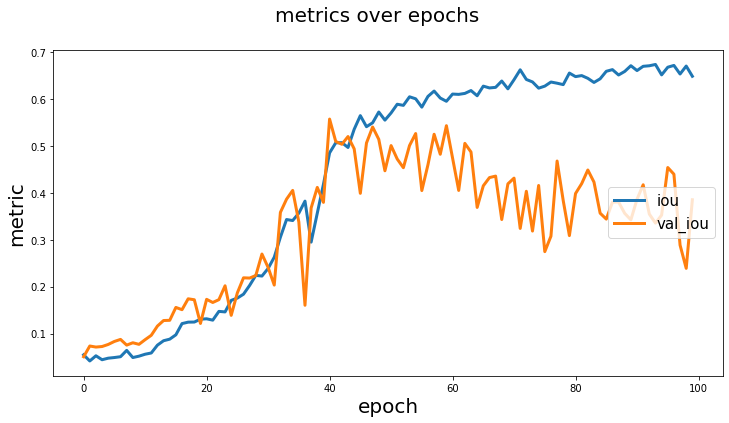

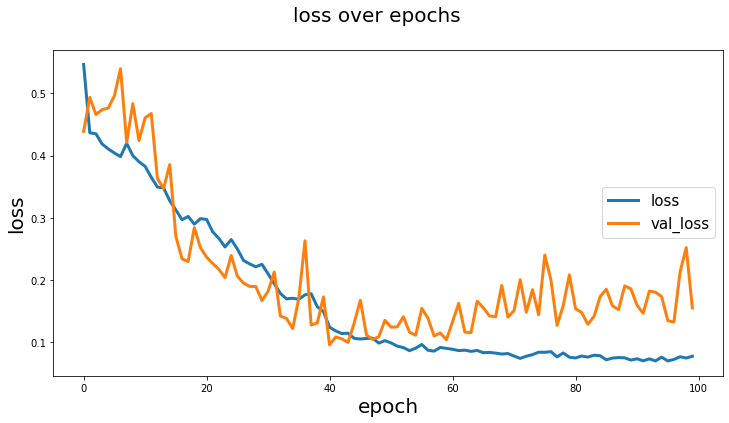

In [25]:
from keras_unet.utils import plot_segm_history

plot_segm_history(history)

In [26]:
y_pred = model.predict(X_test)

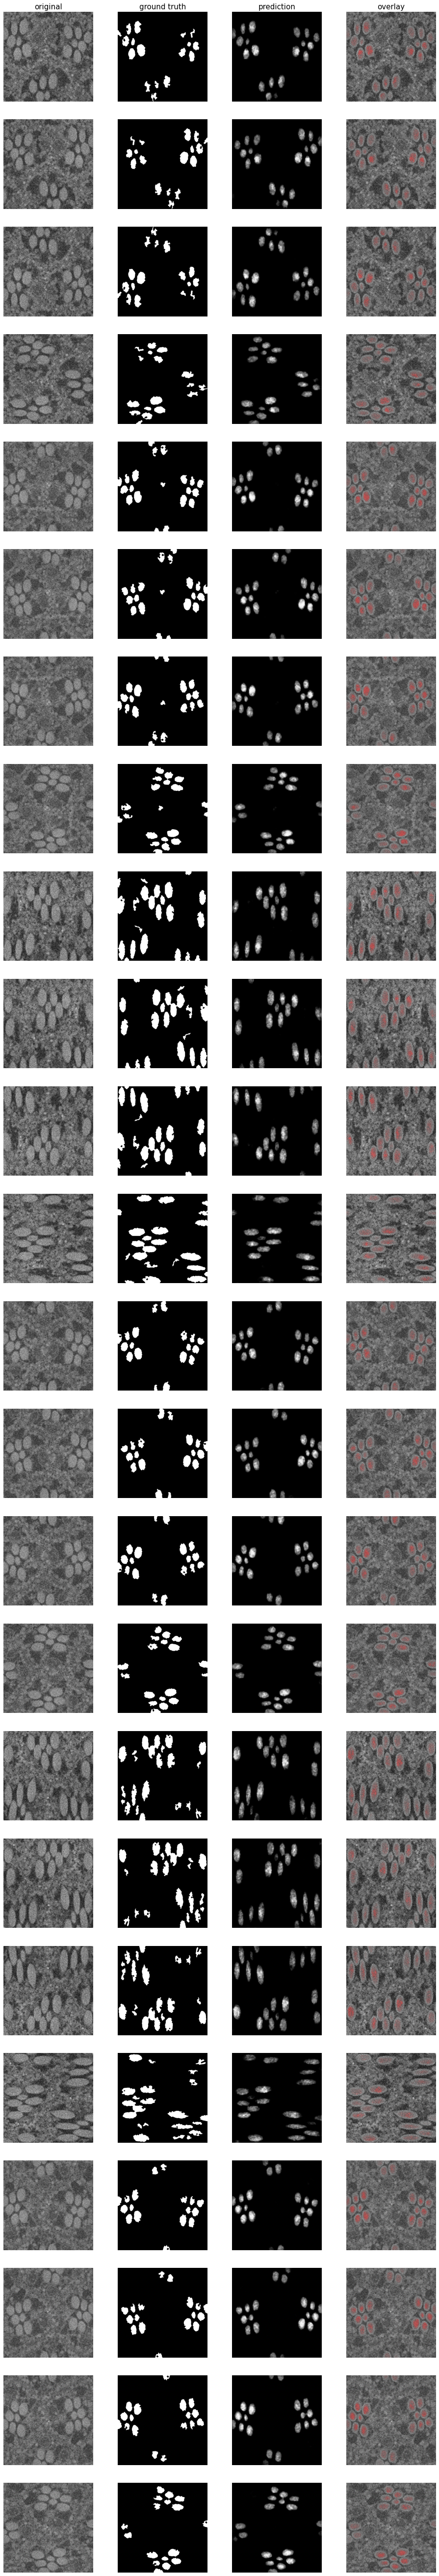

In [27]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=X_test, mask_imgs=y_test, pred_imgs=y_pred, nm_img_to_plot=24)

In [84]:
SRCPATH = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/classified_images/good_images/'

In [85]:
img_file_names = os.listdir(SRCPATH)

In [86]:
len(img_file_names)

254

In [87]:
img_file_names[0]

'000000_000000_000231_000000.tif'

In [88]:
import mahotas as mh

In [92]:
test_slices = []


for img in img_file_names:
    if (img.endswith("tif")):
        a = mh.imread(os.path.join(SRCPATH, img))
        a_cropped = a[1500:2012, 2968:3480].astype(np.float)
        a_cropped /= a_cropped.max()
        a_cropped *= 255

        test_slices.append(a_cropped)

/tmp/ipykernel_1552598/3044670991.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a_cropped = a[1500:2012, 2968:3480].astype(np.float)


In [93]:
test_slices = np.array(test_slices).astype(np.float64)

In [94]:
test_slices.shape

(253, 512, 512)

In [97]:
test_slices = np.expand_dims(test_slices, axis=3)

In [98]:
test_slices.shape

(253, 512, 512, 1)

In [99]:
y_predict = model.predict(test_slices)

In [100]:
y_predict.shape

(253, 512, 512, 1)

In [103]:
fig = plt.figure(figsize=(10, 7))

<Figure size 720x504 with 0 Axes>

In [107]:
import random
random_img = res = random.sample(range(1, 253), 10)

In [109]:
random_img

[161, 40, 11, 91, 155, 186, 242, 127, 241, 79]

In [110]:
y_predict[random_img[0]].shape

(512, 512, 1)

In [111]:
test_sample = []
for i in random_img:
    test_sample.append(y_predict[i])

In [114]:
test_sample = np.array(test_sample)

In [115]:
test_sample.shape

(10, 512, 512, 1)

<Figure size 432x288 with 0 Axes>

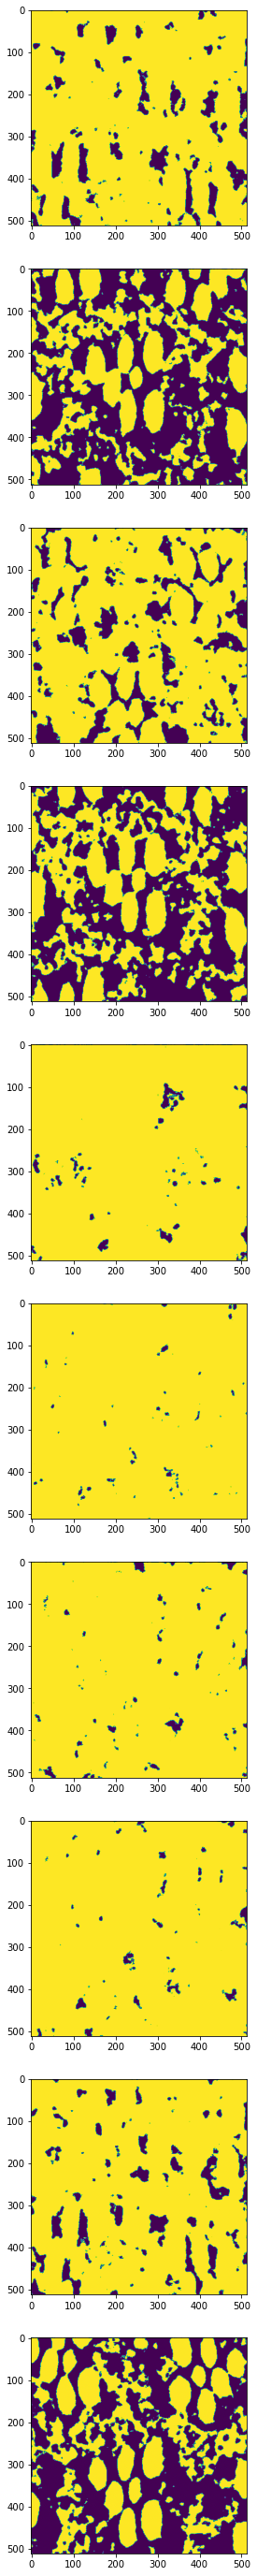

In [125]:
plt.figure()

f, axarr = plt.subplots(10,1) 

f.set_figheight(50)
f.set_figwidth(50)

for i in range(10):
    axarr[i].imshow(test_sample[i])

<Figure size 432x288 with 0 Axes>

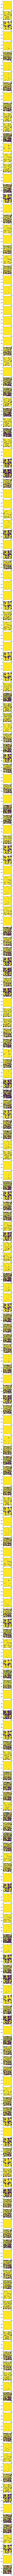

In [131]:
plt.figure()

plot, azarr = plt.subplots(253, 1)

plot.set_figheight(500)
plot.set_figwidth(50)

for i in range(253):
    azarr[i].imshow(y_predict[i])